<a href="https://colab.research.google.com/github/peeka-boo0/ml-learning-journey/blob/main/notebooks/Day_15_svc_and_Learning_validationcurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

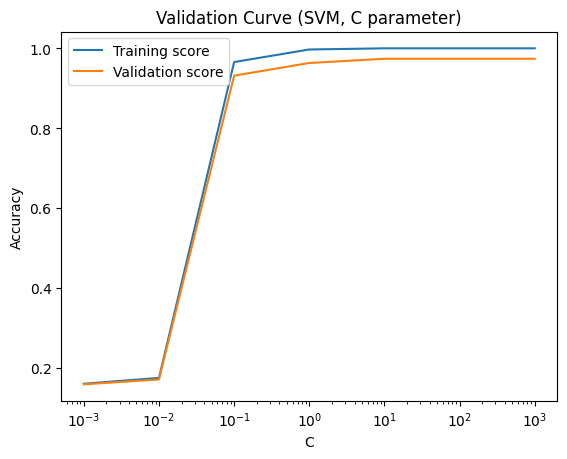

In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Load data
X, y = load_digits(return_X_y=True)

# Try different values of C
param_range = np.logspace(-3, 3, 7)#this is making a array of n numbers from 10^a to 10^b (a,b,n)
train_scores, test_scores = validation_curve(
    SVC(),#the svc is a model mainly work on binary datas
    X, y,
    param_name="C",  #the c give the strictness
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Mean scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot
plt.plot(param_range, train_mean, label="Training score")
plt.plot(param_range, test_mean, label="Validation score")
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Validation Curve (SVM, C parameter)")
plt.legend()
plt.show()


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model (try RBF kernel first)
svc = SVC(kernel='rbf', C=10, gamma=0.0001) #the rbf is ued for nonlenear data type & the gama is the gap around the line the higher the value the smaller the gape is

# Train
svc.fit(X_train, y_train)

# Predict
y_pred = svc.predict(X_test)

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.9888888888888889


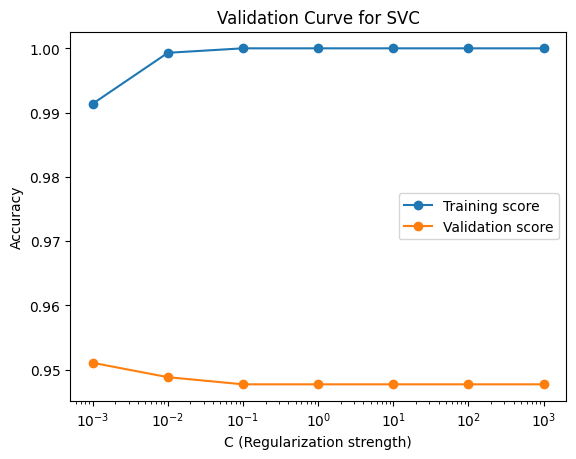

In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()

X, y = digits.data, digits.target

# Define model
svc = SVC(kernel="linear")   # linear SVC for simplicity

# Range of C values (like bow string tightness)
param_range = np.logspace(-3, 3, 7)  # [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Compute training & validation scores
train_scores, val_scores = validation_curve(
    svc, X, y,
    param_name="C",
    param_range=param_range,
    cv=5,  # 5-fold cross validation
    scoring="accuracy",
    n_jobs=-1
)

# Take mean over folds
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Plot the curve
plt.semilogx(param_range, train_mean, label="Training score", marker="o")
plt.semilogx(param_range, val_mean, label="Validation score", marker="o")

plt.xlabel("C (Regularization strength)")
plt.ylabel("Accuracy")
plt.title("Validation Curve for SVC")
plt.legend()
plt.show()


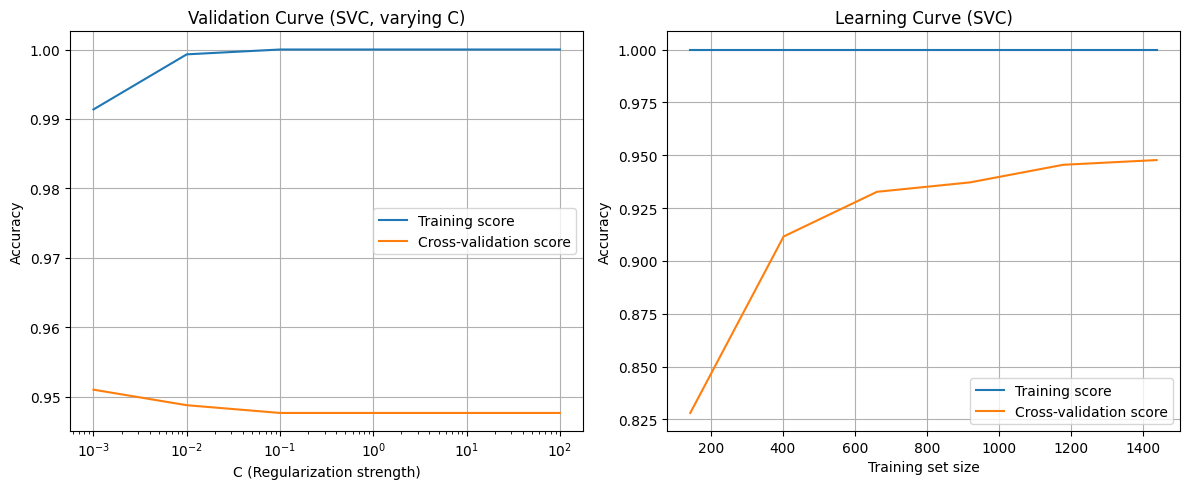

In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve, learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# -------------------------------
# 1. Validation Curve (for 'C')
# -------------------------------
param_range = np.logspace(-3, 2, 6)  # C values: 0.001 → 100
train_scores, test_scores = validation_curve(
    SVC(kernel="linear"), X, y, param_name="C", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# -------------------------------
# 2. Learning Curve
# -------------------------------
train_sizes, train_scores_lc, test_scores_lc = learning_curve(
    SVC(kernel="linear", C=1), X, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 6),
    scoring="accuracy", n_jobs=-1
)

train_mean_lc = train_scores_lc.mean(axis=1)
test_mean_lc = test_scores_lc.mean(axis=1)

# -------------------------------
# 3. Plotting
# -------------------------------
plt.figure(figsize=(12, 5))

# Validation curve
plt.subplot(1, 2, 1)
plt.semilogx(param_range, train_mean, label="Training score")
plt.semilogx(param_range, test_mean, label="Cross-validation score")
plt.title("Validation Curve (SVC, varying C)")
plt.xlabel("C (Regularization strength)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Learning curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_mean_lc, label="Training score")
plt.plot(train_sizes, test_mean_lc, label="Cross-validation score")
plt.title("Learning Curve (SVC)")
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
